# even more fft? wow

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## data retrieval

In [2]:
data = scipy.io.loadmat("data/deblur.mat")

b: np.ndarray = data["B"]
y: np.ndarray = data["Y"].reshape(-1)

n = b.shape[0]
assert b.shape == (n, n) and y.shape == (n ** 2,)

lemme see what the blurred image looks like first

i think the colormap is inverted, so i just subtracted it from $1$ beforehand

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

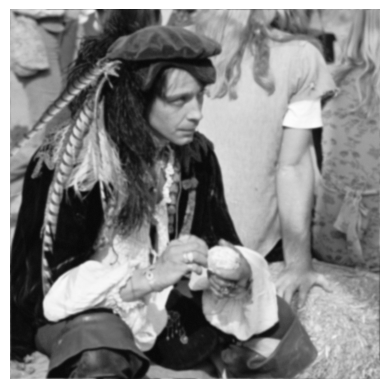

In [3]:
plt.imshow(1 - y.reshape((n, n)), cmap="Greys")
plt.axis("off")

## normal equation algo

In [4]:
e = np.zeros((n, n))
e[0][0] = 1
e[-1][0] = -1

In [5]:
def deblur_img(lambda_: float) -> np.ndarray:
    wb = np.fft.fft2(b).reshape(-1)
    wb_h = np.conj(wb)

    d = wb * wb_h
    for mat in [e, e.T]:
        raw = np.fft.fft2(mat).reshape(-1)
        d += lambda_ * raw * np.conj(raw)

    wy = np.fft.fft2(y.reshape((n, n))).reshape(-1)
    res = (1 / d) * np.conj(wb) * wy
    res = np.fft.ifft2(res.reshape((n, n)))
    return np.real(res)

## actually deblurring stuff

In [6]:
powers = range(-6, 0)
deblurred = [deblur_img(10 ** p) for p in powers]

## results!

let's see how we did

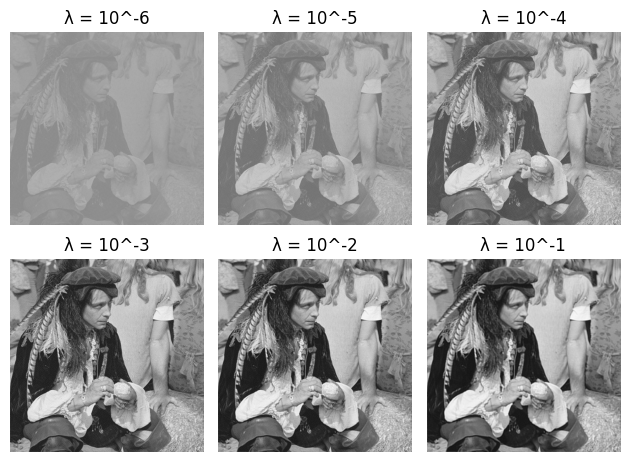

In [7]:
fig, ax = plt.subplots(2, 3)
ax = ax.reshape(-1)
for v, p in enumerate(range(-6, 0)):
    ax[v].imshow(1 - deblurred[v], cmap="Greys")
    ax[v].set_axis_off()
    ax[v].set_title(f"λ = 10^{p}")

fig.tight_layout()